<a href="https://colab.research.google.com/github/aditpurohit/Rideshare-Price-Prediction/blob/main/uber_lyft_ride_prices_random_forrest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link="https://drive.google.com/open?id=15_wSdhmwsiYtKSs77Q1Tm2X5dLcgTJUU"
_,id=link.split("=")
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('cab_rides.csv')
cab_df = pd.read_csv('cab_rides.csv')
cab_df.tail(5)


,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
693066,1.0,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.0,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.0,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.0,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV
693070,1.0,Uber,1543708385534,North End,West End,10.0,1.0,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool


In [ ]:
id="151jOgmg1CI5Ucu5kz1TssecIOdxvTBhI"

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('weather.csv')
weather_df = pd.read_csv('weather.csv')
weather_df.tail(5)

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54
6275,44.69,West End,0.89,1000.70,NaN,1543819974,0.96,1.52


In [ ]:
weather_df.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [ ]:
cab_df['date_time'] = pd.to_datetime(cab_df['time_stamp']/1000, unit='s')
weather_df['date_time'] = pd.to_datetime(weather_df['time_stamp'], unit='s')
cab_df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000105
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.677000046
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.197999954
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749000072
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223000050


In [ ]:
#merge the datasets to refelect same time for a location
cab_df['merge_date'] = cab_df.source.astype(str) +" - "+ cab_df.date_time.dt.date.astype("str") +" - "+ cab_df.date_time.dt.hour.astype("str")
weather_df['merge_date'] = weather_df.location.astype(str) +" - "+ weather_df.date_time.dt.date.astype("str") +" - "+ weather_df.date_time.dt.hour.astype("str")

In [ ]:
weather_df.index = weather_df['merge_date']

In [ ]:
cab_df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time,merge_date
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000105,Haymarket Square - 2018-12-16 - 9
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.677000046,Haymarket Square - 2018-11-27 - 2
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.197999954,Haymarket Square - 2018-11-28 - 1
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749000072,Haymarket Square - 2018-11-30 - 4
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223000050,Haymarket Square - 2018-11-29 - 3


In [ ]:
merged_df = cab_df.join(weather_df,on=['merge_date'],rsuffix ='_w')

In [ ]:
cab_df['rain'].fillna(0,inplace=True)

KeyError: ignored

In [ ]:
merged_df = merged_df[pd.notnull(merged_df['date_time_w'])]

In [ ]:
cab_df = cab_df[pd.notnull(cab_df['price'])]

In [ ]:
cab_df['day'] = cab_df.date_time.dt.dayofweek

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
cab_df['hour'] = cab_df.date_time.dt.hour

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
merged_df['day'].describe()

count    1.164996e+06
mean     2.388427e+00
std      1.743907e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      6.000000e+00
Name: day, dtype: float64

In [ ]:
merged_df.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'date_time',
       'merge_date', 'temp', 'location', 'clouds', 'pressure', 'rain',
       'time_stamp_w', 'humidity', 'wind', 'date_time_w', 'merge_date_w',
       'day', 'hour'],
      dtype='object')

In [ ]:
merged_df.count()

distance            1164996
cab_type            1164996
time_stamp          1164996
destination         1164996
source              1164996
price               1164996
surge_multiplier    1164996
id                  1164996
product_id          1164996
name                1164996
date_time           1164996
merge_date          1164996
temp                1164996
location            1164996
clouds              1164996
pressure            1164996
rain                1164996
time_stamp_w        1164996
humidity            1164996
wind                1164996
date_time_w         1164996
merge_date_w        1164996
day                 1164996
hour                1164996
dtype: int64

In [ ]:
X = merged_df[merged_df.product_id=='lyft_line'][['day','distance','hour','temp','clouds', 'pressure','humidity', 'wind', 'rain']]

In [ ]:
X.count()

day         93762
distance    93762
hour        93762
temp        93762
clouds      93762
pressure    93762
humidity    93762
wind        93762
rain        93762
dtype: int64

In [ ]:
y = merged_df[merged_df.product_id=='lyft_line']['price']

In [ ]:
y.count()

93762

In [ ]:
X.reset_index(inplace=True)
X = X.drop(columns=['index'])

In [ ]:
X.head()

,day,distance,hour,temp,clouds,pressure,humidity,wind,rain
0,6,0.44,9,38.46,0.29,1022.25,0.76,7.68,0.0000
1,0,1.08,6,44.85,0.89,1000.70,0.95,1.53,0.0000
2,4,0.72,2,36.31,0.00,1012.37,0.68,6.85,0.0000
3,1,3.24,3,44.18,0.99,1001.50,0.89,12.40,0.2420
4,1,3.24,3,44.25,1.00,1000.81,0.90,13.70,0.1617


In [ ]:
features = pd.get_dummies(X)

In [ ]:
features.columns

In [ ]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(y)

# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

### Prediction Accuracy for Prices

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

### Lets see the prediction for surge_multiplier

In [ ]:
merged_df_surge = merged_df[merged_df.surge_multiplier < 3]
X = merged_df_surge[['day','hour','temp','clouds', 'pressure','humidity', 'wind', 'rain']]

In [ ]:
X.count()

In [ ]:
features = pd.get_dummies(X)

In [ ]:

y = merged_df_surge['surge_multiplier']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#ignoring multiplier of 3 as there are only 2 values in our dataset
le.fit([1,1.25,1.5,1.75,2.,2.25,2.5])
y = le.transform(y)

In [ ]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(y)

# Saving feature names for later use
feature_list = list(X.columns)
# Convert to numpy array
features = np.array(features)

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

*The dataset is imbalanced when it comes to surge multipliers. More than 90% of the data has a surge multiplier of 1.
We use SMOTE for blancing the training data*

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
train_features, train_labels = sm.fit_resample(train_features, train_labels)

In [ ]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, random_state = 42,class_weight="balanced")
# Train the model on training data
rf.fit(train_features, train_labels);

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Calculating the weighted precision score(taking imbalance of the dataset in account)

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(test_labels, predictions, average="weighted")


In [ ]:
recall_score(test_labels, predictions, average="micro")

#### Confusion Matrix for the Surge Multiplier prediction

In [ ]:
# Create confusion matrix
pd.crosstab(le.inverse_transform(test_labels), le.inverse_transform(predictions),rownames=['Actual'],colnames=['Predicted'])

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

In [ ]:
from sklearn.metrics import accuracy_score

#### Accuracy of the Classifier

In [ ]:
accuracy_score(test_labels, predictions)


In [ ]:
merged_df = cab_df.copy()

In [ ]:
merged_df['date'] = merged_df["date_time"].dt.date
merged_df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time,day,hour,date
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000105,6,9,2018-12-16
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.677000046,1,2,2018-11-27
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.197999954,2,1,2018-11-28
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749000072,4,4,2018-11-30
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223000050,3,3,2018-11-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,1.00,Uber,1543708385534,North End,West End,9.5,1.0,353e6566-b272-479e-a9c6-98bd6cb23f25,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,2018-12-01 23:53:05.533999919,5,23,2018-12-01
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-12-01 23:53:05.533999919,5,23,2018-12-01
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,2018-12-01 23:53:05.533999919,5,23,2018-12-01
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-12-01 23:53:05.533999919,5,23,2018-12-01


In [ ]:
UB_df = merged_df[merged_df["name"]=="UberX"]

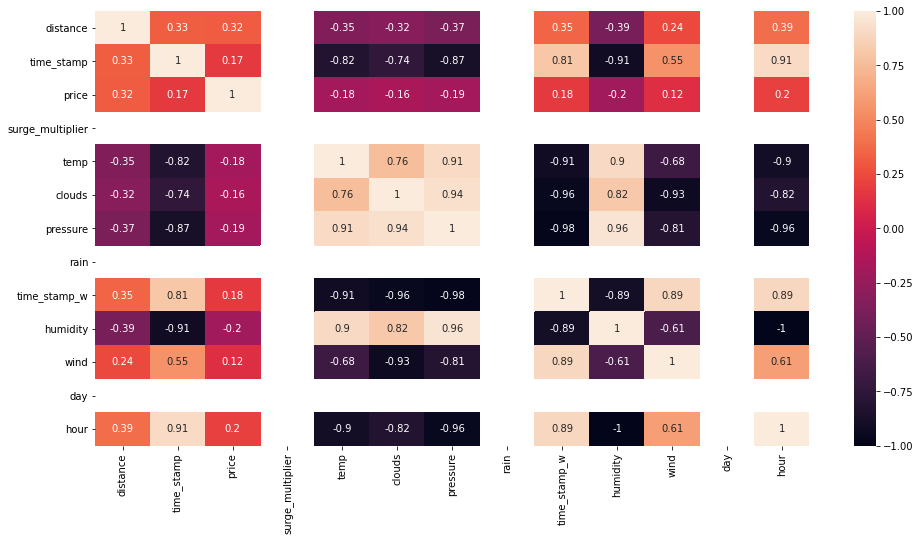

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = BU_uber_8to10.corr()
plt.subplots(figsize=(16,8))
sn.heatmap(corrMatrix, annot=True)

plt.show()

In [ ]:
Uber = merged_df[merged_df["cab_type"]=="Uber"]
Lyft = merged_df[merged_df["cab_type"]=="Lyft"]

In [ ]:
merged_df['destination'].value_counts()

Financial District         54192
Back Bay                   53190
Theatre District           53189
Boston University          53171
Haymarket Square           53171
Fenway                     53166
Northeastern University    53165
North End                  53164
South Station              53159
West End                   52992
Beacon Hill                52840
North Station              52577
Name: destination, dtype: int64

In [ ]:
BU_uber = Uber[(Uber["destination"]=="Boston University" ) & (BU_uber['distance'] >= 2.8) & (BU_uber['distance'] <= 3.0) ]
BU_lyft = Lyft[(Lyft["destination"]=="Boston University" ) &  (BU_lyft['distance'] >= 2.8) & (BU_lyft['distance'] <= 3.0)]


In [ ]:
len(BU_lyft), len(BU_uber)

(4362, 4710)

In [ ]:
BU_uber

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time,day,hour,date
438,2.8,Uber,1545138603671,Boston University,West End,11.0,1.0,28aab9c5-d14e-47a9-b3ed-4ebdf31623e5,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,2018-12-18 13:10:03.671000004,1,13,2018-12-18
439,2.8,Uber,1543366283445,Boston University,West End,34.0,1.0,6f289572-53c0-457f-9112-b88a47e11660,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-11-28 00:51:23.444999933,2,0,2018-11-28
440,2.8,Uber,1543805877985,Boston University,West End,11.0,1.0,7ce4e4bd-0983-4b67-976f-ec6eaf580ac3,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,2018-12-03 02:57:57.984999895,0,2,2018-12-03
442,2.8,Uber,1543656182434,Boston University,West End,17.0,1.0,8cad2132-8b60-4799-82f9-daee668f2d8e,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-12-01 09:23:02.434000015,5,9,2018-12-01
443,2.8,Uber,1545055212592,Boston University,West End,25.0,1.0,96498f61-7aa2-4dc2-8d7f-502960e26de4,6c84fd89-3f11-4782-9b50-97c468b19529,Black,2018-12-17 14:00:12.592000008,0,14,2018-12-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691997,2.8,Uber,1543628884172,Boston University,West End,33.5,1.0,29753916-66b6-4335-baeb-e4f292408070,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-12-01 01:48:04.171999931,5,1,2018-12-01
691998,2.8,Uber,1543628884172,Boston University,West End,9.0,1.0,51da5aac-79bf-4f1b-99cd-3e43db611a48,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,2018-12-01 01:48:04.171999931,5,1,2018-12-01
691999,2.8,Uber,1543344502686,Boston University,West End,10.5,1.0,89f3b0ee-b349-44c8-a1fa-6e0776301298,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,2018-11-27 18:48:22.686000109,1,18,2018-11-27
692000,2.8,Uber,1543344502686,Boston University,West End,23.0,1.0,9bff8a86-9d97-4114-8db9-6125430af966,6c84fd89-3f11-4782-9b50-97c468b19529,Black,2018-11-27 18:48:22.686000109,1,18,2018-11-27


In [ ]:
import datetime as dt
BU_uber_day = BU_uber[BU_uber["date"].values == dt.date(2018, 11, 27)]

In [ ]:
BU_uber_day["name"].value_counts()

UberPool     83
Black        78
Black SUV    77
UberX        77
UberXL       74
WAV          70
Name: name, dtype: int64

In [ ]:
BU_uber_day["time"] = BU_uber_day["date_time"].dt.time

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
BU_uber_8to10 = BU_uber_day[(BU_uber_day["time"] >= dt.time(12,0,0)) & (BU_uber_day["time"] <= dt.time(14,0,0))]

(array([ 8., 19., 12., 10.,  0., 11., 12., 13.,  7.,  1., 10.,  7., 15.,
        12., 19.,  9.,  6.,  3.,  1., 15., 10.,  2.,  6.,  8., 17.,  5.,
         7.,  6.,  9.,  9., 10.,  8., 11., 10.,  7., 16.,  3., 16., 16.,
         9., 11.,  5., 15., 10., 14., 12., 11.,  6.]),
 array([737025.00016594, 737025.02069734, 737025.04122874, 737025.06176014,
        737025.08229154, 737025.10282294, 737025.12335434, 737025.14388574,
        737025.16441714, 737025.18494854, 737025.20547994, 737025.22601134,
        737025.24654274, 737025.26707414, 737025.28760554, 737025.30813694,
        737025.32866834, 737025.34919974, 737025.36973114, 737025.39026254,
        737025.41079394, 737025.43132534, 737025.45185674, 737025.47238814,
        737025.49291954, 737025.51345094, 737025.53398234, 737025.55451374,
        737025.57504514, 737025.59557654, 737025.61610794, 737025.63663934,
        737025.65717074, 737025.67770214, 737025.69823355, 737025.71876495,
        737025.73929635, 737025.75982775, 

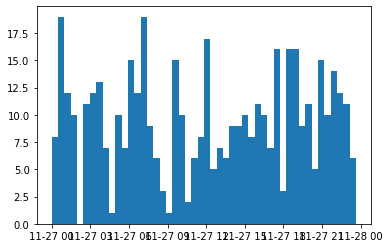

In [ ]:
BU_uber_8 = BU_uber_day[(BU_uber_day["time"] >= dt.time(12,0,0)) & (BU_uber_day["time"] <= dt.time(12,30,0))]
BU_uber_8.groupby(["price", "name"]).count()
plt.hist(BU_uber_day['date_time'], bins = 48)

In [ ]:
Lyft["date_time"][Lyft['surge_multiplier'] == 2.5]

71555    2018-11-27 22:12:23.099999905
71555    2018-11-27 22:12:23.099999905
71556    2018-12-16 23:40:18.739000082
160088   2018-11-27 16:54:22.045000076
160088   2018-11-27 16:54:22.045000076
160091   2018-11-27 16:54:22.045000076
160091   2018-11-27 16:54:22.045000076
289791   2018-11-27 09:03:21.921999931
289791   2018-11-27 09:03:21.921999931
289792   2018-12-17 03:05:03.671999931
499099   2018-11-28 12:32:08.522000074
499099   2018-11-28 12:32:08.522000074
499099   2018-11-28 12:32:08.522000074
499100   2018-11-28 12:32:08.522000074
499100   2018-11-28 12:32:08.522000074
499100   2018-11-28 12:32:08.522000074
537448   2018-11-27 04:42:21.898000002
537448   2018-11-27 04:42:21.898000002
537450   2018-12-14 03:40:07.486000061
649747   2018-12-01 13:57:58.832999945
649750   2018-12-01 13:57:58.832999945
Name: date_time, dtype: datetime64[ns]

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time,merge_date,temp,location,clouds,pressure,rain,time_stamp_w,humidity,wind,date_time_w,merge_date_w,day,hour,date
12,1.11,Uber,1543615981179,West End,North End,12.0,1.0,009e9c53-074d-43cf-aef2-0fbc7a47ed3d,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-11-30 22:13:01.178999901,North End - 2018-11-30 - 22,38.65,North End,0.96,1017.23,0.0000,1.543618e+09,0.65,3.13,2018-11-30 22:52:54,North End - 2018-11-30 - 22,4,22,2018-11-30
13,1.11,Uber,1544698211014,West End,North End,16.0,1.0,23f145da-f0c1-4d1f-a184-496bc003a7db,6c84fd89-3f11-4782-9b50-97c468b19529,Black,2018-12-13 10:50:11.013999939,North End - 2018-12-13 - 10,20.12,North End,0.43,1031.07,0.0000,1.544698e+09,0.64,3.88,2018-12-13 10:45:01,North End - 2018-12-13 - 10,3,10,2018-12-13
14,1.11,Uber,1544728503935,West End,North End,7.5,1.0,357559cb-8c58-4278-a41a-e33b2e0997a3,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,2018-12-13 19:15:03.934999943,North End - 2018-12-13 - 19,32.75,North End,0.51,1033.75,0.0000,1.544730e+09,0.57,1.90,2018-12-13 19:45:01,North End - 2018-12-13 - 19,3,19,2018-12-13
15,1.11,Uber,1545004511430,West End,North End,7.5,1.0,50ef1165-9d23-416c-a65c-18906207b295,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,2018-12-16 23:55:11.430000067,North End - 2018-12-16 - 23,42.36,North End,1.00,1012.15,0.2088,1.545004e+09,0.77,11.46,2018-12-16 23:45:01,North End - 2018-12-16 - 23,6,23,2018-12-16
16,1.11,Uber,1544748007961,West End,North End,26.0,1.0,91c4861c-1780-42b0-bca1-bbd64a422cc3,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-12-14 00:40:07.960999966,North End - 2018-12-14 - 0,30.07,North End,0.69,1034.97,0.0000,1.544748e+09,0.68,1.98,2018-12-14 00:45:01,North End - 2018-12-14 - 0,4,0,2018-12-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,1.00,Uber,1543708385534,North End,West End,9.5,1.0,353e6566-b272-479e-a9c6-98bd6cb23f25,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,2018-12-01 23:53:05.533999919,West End - 2018-12-01 - 23,36.69,West End,0.41,1023.64,0.0000,1.543708e+09,0.76,2.51,2018-12-01 23:52:55,West End - 2018-12-01 - 23,5,23,2018-12-01
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-12-01 23:53:05.533999919,West End - 2018-12-01 - 23,36.69,West End,0.41,1023.64,0.0000,1.543708e+09,0.76,2.51,2018-12-01 23:52:55,West End - 2018-12-01 - 23,5,23,2018-12-01
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,2018-12-01 23:53:05.533999919,West End - 2018-12-01 - 23,36.69,West End,0.41,1023.64,0.0000,1.543708e+09,0.76,2.51,2018-12-01 23:52:55,West End - 2018-12-01 - 23,5,23,2018-12-01
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-12-01 23:53:05.533999919,West End - 2018-12-01 - 23,36.69,West End,0.41,1023.64,0.0000,1.543708e+09,0.76,2.51,2018-12-01 23:52:55,West End - 2018-12-01 - 23,5,23,2018-12-01


In [ ]:
BU_uber_8

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time,merge_date,temp,location,clouds,pressure,rain,time_stamp_w,humidity,wind,date_time_w,merge_date_w,day,hour,date,time
